## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [2]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi


'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [17]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [18]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = (x-x.min() / x.max()-x.min())
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [38]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128,128 ,128 ,128 ,128 ,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [39]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               1651

In [40]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [41]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [42]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 3s 14ms/step - loss: 10.3255 - accuracy: 0.1479 - val_loss: 1.9515 - val_accuracy: 0.2814
Epoch 2/100
196/196 [==============================] - 2s 12ms/step - loss: 1.9307 - accuracy: 0.2959 - val_loss: 1.8822 - val_accuracy: 0.3144
Epoch 3/100
196/196 [==============================] - 2s 12ms/step - loss: 1.8437 - accuracy: 0.3326 - val_loss: 1.7453 - val_accuracy: 0.3732
Epoch 4/100
196/196 [==============================] - 3s 13ms/step - loss: 1.7367 - accuracy: 0.3760 - val_loss: 1.7039 - val_accuracy: 0.3852
Epoch 5/100
196/196 [==============================] - 2s 13ms/step - loss: 1.7040 - accuracy: 0.3888 - val_loss: 1.6735 - val_accuracy: 0.3953
Epoch 6/100
196/196 [==============================] - 2s 12ms/step - loss: 1.6673 - accuracy: 0.4038 - val_loss: 1.7178 - val_accuracy: 0.3807
Epoch 7/100
196/196 [==============================] - 3s 13ms/step - loss: 1.6187 - accuracy: 0.4195 - val_loss: 1.5769 - val_accuracy

196/196 [==============================] - 2s 12ms/step - loss: 1.0495 - accuracy: 0.6234 - val_loss: 1.5245 - val_accuracy: 0.4995
Epoch 58/100
196/196 [==============================] - 3s 13ms/step - loss: 1.0165 - accuracy: 0.6373 - val_loss: 1.5166 - val_accuracy: 0.5073
Epoch 59/100
196/196 [==============================] - 3s 14ms/step - loss: 1.0240 - accuracy: 0.6377 - val_loss: 1.5015 - val_accuracy: 0.5078
Epoch 60/100
196/196 [==============================] - 2s 13ms/step - loss: 0.9940 - accuracy: 0.6420 - val_loss: 1.5915 - val_accuracy: 0.4890
Epoch 61/100
196/196 [==============================] - 2s 12ms/step - loss: 1.0208 - accuracy: 0.6366 - val_loss: 1.5645 - val_accuracy: 0.4950
Epoch 62/100
196/196 [==============================] - 2s 12ms/step - loss: 0.9747 - accuracy: 0.6490 - val_loss: 1.5437 - val_accuracy: 0.4987
Epoch 63/100
196/196 [==============================] - 2s 12ms/step - loss: 0.9730 - accuracy: 0.6512 - val_loss: 1.5294 - val_accuracy: 0.508

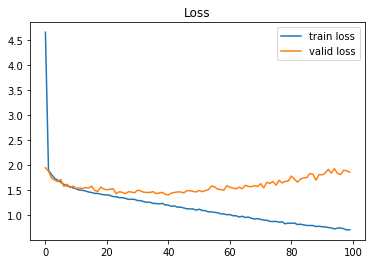

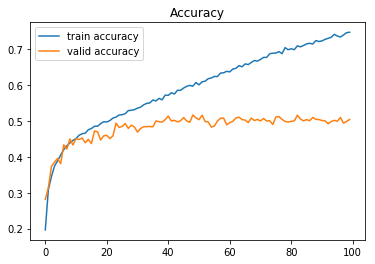

In [43]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()